### Basic Concept:
K-Means aims to divide \( n \) observations (data points) into \( K \) clusters where each observation belongs to the cluster with the nearest mean (centroid). The algorithm works iteratively to assign each data point to one of \( K \) clusters based on the features provided.

### Algorithm Steps:
1. **Initialization**:
   - Randomly choose \( K \) data points (centroids) as the initial cluster centers.
   
2. **Assignment**:
   - Assign each data point to the nearest centroid, forming \( K \) clusters.

3. **Update Centroids**:
   - Recalculate the centroid of each cluster based on the current assignments.

4. **Iteration**:
   - Repeat steps 2 and 3 until convergence (when centroids do not change significantly or a maximum number of iterations is reached).

### Key Parameters:
- **K**: Number of clusters to be formed.
- **Initial Centroids**: Method to choose initial centroids (often randomly).
- **Distance Metric**: Typically Euclidean distance, but can be customized based on the application.

### Optimization Objective:
Minimizes the distances of centroids and mean of the clusters.

### Advantages:
- **Simplicity**: Easy to understand and implement.
- **Efficiency**: Computationally efficient, particularly with large datasets.
- **Scalability**: Scales well to large datasets with a large number of variables.

### Disadvantages:
- **Number of Clusters (K)**: Needs to be specified a priori, which can be challenging.
- **Sensitive to Initial Centroids**: Results can vary with different initial centroid selections.
- **Assumes Spherical Clusters**: Works best when clusters are roughly spherical and of similar size.

### Practical Considerations:
- **Initialization Techniques**: Strategies like K-Means++ for better initial centroid selection.
- **Choosing K**: Methods such as the elbow method or silhouette analysis can help determine the optimal number of clusters, .
- **Scaling Data**: Often necessary to standardize or normalize data before applying K-Means.

### Applications:
- **Customer Segmentation**: Grouping customers based on their purchasing behavior.
- **Image Segmentation**: Identifying objects or regions of interest in images.
- **Anomaly Detection**: Identifying unusual patterns that do not fit into any cluster.

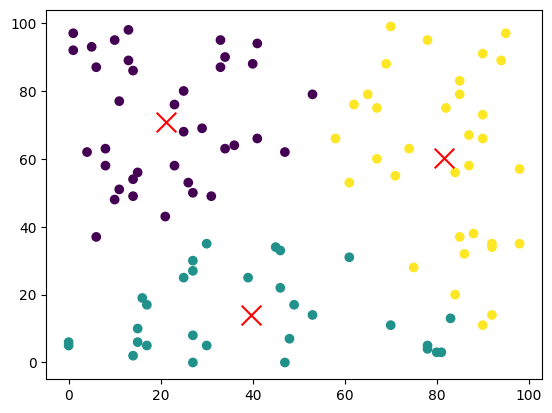

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, k, num_epoch=100):
        self.k = k
        self.num_epoch = num_epoch

    @staticmethod
    def calculate_distance(p, centroids):
        return np.sqrt(np.sum((centroids - p)**2, axis=1))

    @staticmethod
    def calculate_mean(X_sub):
        return np.mean(X_sub, axis=0)

    def fit(self, X):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        for epoch in range(self.num_epoch):
            labels = []
            clusters = [[] for _ in range(self.k)]

            for point in X:
                cluster = np.argmin(KMeansClustering.calculate_distance(point, self.centroids))
                labels.append(cluster)
                clusters[cluster].append(point)

            new_centroids = []
            for cluster in clusters:
                if not cluster:
                    new_centroids.append(np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), X.shape[1]))
                else:
                    new_centroids.append(KMeansClustering.calculate_mean(cluster))

            new_centroids = np.array(new_centroids)
            if np.allclose(self.centroids, new_centroids, atol=0.0001):
                break
            self.centroids = new_centroids

        return np.array(labels)

# Generate some random data
data = np.random.randint(0, 100, (100, 2))

# Instantiate the model
model = KMeansClustering(k=3)

# Fit the model to the data
labels = model.fit(data)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', marker='x', s=200)
plt.show()
